In [83]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, classification_report

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

5


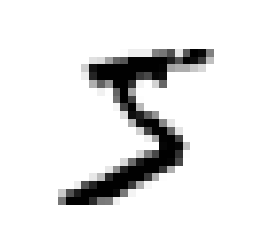

In [6]:
X, y = mnist["data"], mnist["target"].astype(np.int8)

nb = 0
print(y[nb])
plt.imshow(X[nb].reshape(28,28), cmap = 'binary', interpolation="none")
plt.axis("off")
plt.show()

In [14]:
train_samples = 10000
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Classificateur binaire avec fonction charnière (analogue SVM)

In [53]:
sgd_clf = SGDClassifier(max_iter=10, tol=-np.infty)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=-inf,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
nb = 87
score = sgd_clf.decision_function([X_test[nb]])
print(np.argmax(score), y_test[nb])

prediction = sgd_clf.predict(X_test)
print(classification_report(y_test.tolist(), prediction, digits=4))

0 0
              precision    recall  f1-score   support

           0     0.9390    0.9666    0.9526       988
           1     0.9186    0.9710    0.9441      1104
           2     0.9136    0.8817    0.8974       972
           3     0.9096    0.8551    0.8815      1035
           4     0.9206    0.9079    0.9142      1021
           5     0.8707    0.8421    0.8562       912
           6     0.9294    0.9397    0.9345       995
           7     0.9075    0.9366    0.9218      1026
           8     0.8687    0.8643    0.8665       980
           9     0.8719    0.8800    0.8760       967

    accuracy                         0.9058     10000
   macro avg     0.9050    0.9045    0.9045     10000
weighted avg     0.9056    0.9058    0.9054     10000



Classificateur logistique ou softmax (selon la valeur de multi_class)

In [48]:
softmax_clf = LogisticRegression(multi_class="multinomial",solver="saga",\
                                 C=0.1, penalty='l2', tol=0.1, n_jobs=-1)
softmax_clf.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

In [85]:
score = softmax_clf.decision_function([X_test[nb]])
print(np.argmax(score), y_test[nb])

prediction = softmax_clf.predict(X_test)
print(classification_report(y_test.tolist(), prediction, digits=4))

0 0
              precision    recall  f1-score   support

           0     0.9230    0.9585    0.9404       988
           1     0.8158    0.9792    0.8901      1104
           2     0.8911    0.8333    0.8612       972
           3     0.8959    0.8319    0.8627      1035
           4     0.8846    0.9011    0.8928      1021
           5     0.8824    0.7895    0.8333       912
           6     0.8991    0.9317    0.9151       995
           7     0.8843    0.8938    0.8890      1026
           8     0.8773    0.7806    0.8261       980
           9     0.8332    0.8469    0.8400       967

    accuracy                         0.8767     10000
   macro avg     0.8787    0.8746    0.8751     10000
weighted avg     0.8781    0.8767    0.8758     10000



Classificateur SVM

In [39]:
svm_clf = SVC(kernel='rbf', gamma='auto')
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
score = svm_clf.decision_function([X_test[nb]])
print(score)
print(np.argmax(score), y_test[nb])

prediction = svm_clf.predict(X_test)
print(classification_report(y_test.tolist(), prediction, digits=4))

[[ 9.29986778 -0.30061107  7.26721984  2.77503074  0.74032486  4.83687112
   8.28169182  4.89537242  4.95922293  1.77372412]]
0 0
              precision    recall  f1-score   support

           0     0.9756    0.9727    0.9742       988
           1     0.9652    0.9810    0.9730      1104
           2     0.9331    0.9331    0.9331       972
           3     0.9491    0.9188    0.9337      1035
           4     0.9575    0.9481    0.9528      1021
           5     0.9416    0.9189    0.9301       912
           6     0.9522    0.9618    0.9570       995
           7     0.8643    0.9435    0.9021      1026
           8     0.9623    0.9378    0.9499       980
           9     0.9350    0.9069    0.9207       967

    accuracy                         0.9429     10000
   macro avg     0.9436    0.9423    0.9427     10000
weighted avg     0.9437    0.9429    0.9430     10000



Arbre de décision

In [79]:
tree_clf = DecisionTreeClassifier(max_depth = None, max_features=784)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=784, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
#score = tree_clf.decision_function([X_test[nb]])
#print(score)
#print(np.argmax(score), y_test[nb])

prediction = tree_clf.predict(X_test)
print(classification_report(y_test.tolist(), prediction, digits=4))

              precision    recall  f1-score   support

           0     0.9170    0.8836    0.9000       988
           1     0.9042    0.9321    0.9179      1104
           2     0.7644    0.7942    0.7790       972
           3     0.7512    0.7498    0.7505      1035
           4     0.8060    0.8100    0.8080      1021
           5     0.7101    0.6875    0.6986       912
           6     0.8596    0.8492    0.8544       995
           7     0.8650    0.8616    0.8633      1026
           8     0.7184    0.6949    0.7064       980
           9     0.7363    0.7653    0.7505       967

    accuracy                         0.8054     10000
   macro avg     0.8032    0.8028    0.8029     10000
weighted avg     0.8054    0.8054    0.8053     10000



In [78]:
export_graphviz(
        tree_clf,
        out_file="digit.dot",
        class_names=y_train.astype(str),
        rounded=True,
        filled=True
    )

Forêt aléatoire

In [88]:
forest_clf = RandomForestClassifier(n_estimators=10)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
prediction = forest_clf.predict(X_test)
print(classification_report(y_test.tolist(), prediction, digits=4))

              precision    recall  f1-score   support

           0     0.9379    0.9636    0.9506       988
           1     0.9322    0.9837    0.9572      1104
           2     0.8955    0.9259    0.9105       972
           3     0.8688    0.8763    0.8725      1035
           4     0.8908    0.9265    0.9083      1021
           5     0.9098    0.8410    0.8741       912
           6     0.9375    0.9347    0.9361       995
           7     0.9307    0.9162    0.9234      1026
           8     0.8993    0.8388    0.8680       980
           9     0.9000    0.8842    0.8920       967

    accuracy                         0.9105     10000
   macro avg     0.9103    0.9091    0.9093     10000
weighted avg     0.9104    0.9105    0.9101     10000

